## a.Divide the dataset as train,development and test

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
np.random.seed(10000)

data=np.genfromtxt('iris.csv',dtype=str,delimiter=',')
total_index=np.arange(0,data.shape[0])
np.random.shuffle(total_index)

train_index=total_index[:int(0.6*data.shape[0])]
train_data=np.asarray(data[train_index][:,:-1],dtype=np.float)
train_names=data[train_index][:,-1]


development_index=total_index[int(0.6*data.shape[0]):int(0.8*data.shape[0])]
development_data=np.asarray(data[development_index][:,:-1],dtype=np.float)
development_names=data[development_index][:,-1]

test_index=total_index[int(0.8*data.shape[0]):]
test_data=np.asarray(data[test_index][:,:-1],dtype=np.float)
test_names=data[test_index][:,-1]

print(train_index)
print(development_index)
print(test_index)

#print(dev_data)
#print(dev_names)
#print(test_data)
#print(test_names)
#print(dev_data.shape)


[125 130  36 122  57 105  64  89 128 142  65  67 110  42  22 148 102 106
 149  24 103 116  31 117  49  32  51  12 119  87 107  63 126 124 118  48
 120 136 108 100  11 138 113  95  37  20 123 137  17 109  18  59 101  98
 115 144  56  34   5   9 143  45  52   8  44 129  92  25 112 145  28  29
  16  66  19  73  38  97 132  84   0  90  69  50  83  23  33 135   3  99]
[ 10  94  81 131 146   7 133  71   1  13 139 104 134 114  27  68  86 147
  55  60  80 141  82  79  78  93   4  88  46  91]
[ 58 111  96 127   6  30 121  77  35  26  74  41  43  72  15  14  76  75
  62  39  54  85  70  61  21   2  47  40  53 140]


## b.implementing knn using distance metric Euclidean distance

In [2]:
def euclidean_distance(test_row,train_data):
    
    return np.sqrt(np.sum((train_data-test_row)**2,axis=1))

def knn(test_row,train_data,metric,k):
    dist=metric(test_row,train_data)
    require_index=dist.argsort()[:k]
    
    required_names=train_names[require_index]
    cnt=Counter(required_names)
    result=cnt.most_common()[0][0]
    
    return result 


#class_label=knn(dev_data[0],train_data,euclidean_distance,65)
#print(class_label)
    

## b.implementing knn using distance metric Normalized Euclidean distance

In [3]:
def normalized_euclidean_distance(test_row,train_data):
    
    norm_train_data=(train_data-train_data.mean(axis=0))/train_data.std(axis=0)
    norm_test_row=(test_row-train_data.mean(axis=0))/train_data.std(axis=0)
    return np.sqrt(np.sum((norm_train_data-norm_test_row)**2,axis=1))

#class_label=knn(development_data[0],train_data,normalized_euclidean_distance,65)
#print(class_label)
    

## b.implimenting knn using distance metric Cosine Similarity

In [4]:
def cosine_similarity(test_row,train_data):
    dist=[]
    for rec in train_data:
        dot_product=np.dot(test_row,rec)
        mod_product=np.linalg.norm(test_row)*np.linalg.norm(rec)
        dist.append(1-(dot_product/mod_product))
    return np.array(dist)
#class_label=knn(development_data[0],train_data,cosine_similarity,65)
#print(class_label)

## c.calculating accuracy using Train and Development dataset , finding optimal hyper parameters and drawing bar charts for accuracy

                 k=1       k=3       k=5       k=7
eucli       0.966667  1.000000  0.966667  1.000000
norm_eucli  0.900000  0.933333  0.966667  0.966667
cosine      0.966667  0.933333  0.966667  0.933333


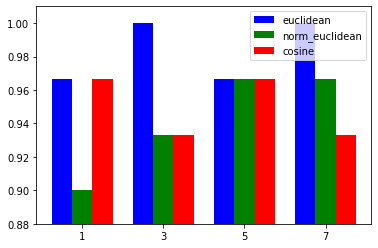

In [5]:
def accuracy(verify_names,verify_data,train_data,metric,k):
    accurate=0
    for i,verify_row in enumerate(verify_data):
        class_label= knn(verify_row,train_data,metric,k)
        #print(class_label,verify_names[i])
        if(verify_names[i]==class_label):
            accurate+=1
    return accurate/verify_data.shape[0]

euclidean_accuracy=[]
normalized_euclidean_accuracy=[]
cosine_accuracy=[]
required_k= np.array([1,3,5,7])
for k in required_k:
    
    euclidean_accuracy.append(accuracy(development_names,development_data,train_data,euclidean_distance,k))
    normalized_euclidean_accuracy.append(accuracy(development_names,development_data,train_data,normalized_euclidean_distance,k))
    cosine_accuracy.append(accuracy(development_names,development_data,train_data,cosine_similarity,k))                                  

k=np.vstack((euclidean_accuracy,normalized_euclidean_accuracy,cosine_accuracy))
pd_test=pd.DataFrame(k,columns=['k=1','k=3','k=5','k=7'])
pd_test.index=['eucli','norm_eucli','cosine']
print(pd_test)

ax = plt.subplot(111)
ax.bar(required_k-0.5,euclidean_accuracy, width=0.5, color='b', align='center',label='euclidean')
ax.bar(required_k,normalized_euclidean_accuracy, width=0.5, color='g', align='center',label='norm_euclidean')
ax.bar(required_k+0.5,cosine_accuracy, width=0.5, color='r', align='center',label='cosine')

min_value=min((euclidean_accuracy+normalized_euclidean_accuracy+cosine_accuracy))
max_value=max((euclidean_accuracy+normalized_euclidean_accuracy+cosine_accuracy))
ax.set_xticks(required_k)
ax.set_ylim(min_value-0.02,max_value+0.01)
ax.legend()

From my observations at k=5 and k=7 we are getting consistent accuracy.i am choosing k=7 as it is optimal and consistent.

## d. with test datset finding final accuracy by using optimal hyper parameter

                 k=7
eucli       0.933333
norm_eucli  0.866667
cosine      0.933333


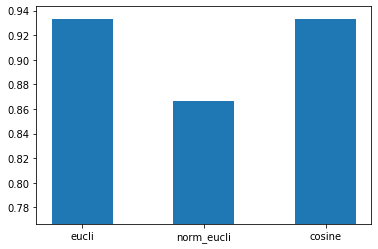

In [6]:
eucli_test_accuracy=accuracy(test_names,test_data,train_data,euclidean_distance,7)

norm_eucli_test_accuracy=accuracy(test_names,test_data,train_data,normalized_euclidean_distance,7)

cosine_test_accuracy=accuracy(test_names,test_data,train_data,cosine_similarity,7)
plt.bar(['eucli','norm_eucli','cosine'],[eucli_test_accuracy,norm_eucli_test_accuracy,cosine_test_accuracy],width=0.5)
min_value=min(eucli_test_accuracy,norm_eucli_test_accuracy,cosine_test_accuracy)
max_value=max(eucli_test_accuracy,norm_eucli_test_accuracy,cosine_test_accuracy)
plt.ylim(min_value-0.1,max_value+0.01)



k=np.vstack((eucli_test_accuracy,norm_eucli_test_accuracy,cosine_test_accuracy))
pd_test=pd.DataFrame(k,columns=['k=7'])
pd_test.index=['eucli','norm_eucli','cosine']
print(pd_test)



From my results above, the euclidean distance or cosine similarity with k=7 gives the best optimal accuracy(93%).